<a href="https://colab.research.google.com/gist/ArjunGP86/a1cb33c7e341646644738e0911f2d93a/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smew2.csv')
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Information about the data:")
df.info()

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   float64
 1   Age                         1000 non-null   float64
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
print("Statistics of the data:")
df.describe()

Statistics of the data:


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,27.510000,95.950000,3.321000,39.898000,15.611000,22.560000
std,288.819436,3.930057,38.850442,1.914582,26.393867,8.819493,8.516274
min,1.000000,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,250.750000,24.000000,65.000000,2.000000,20.000000,8.000000,17.750000
50%,500.500000,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,750.250000,30.250000,120.000000,4.000000,55.000000,22.000000,28.000000
max,1000.000000,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


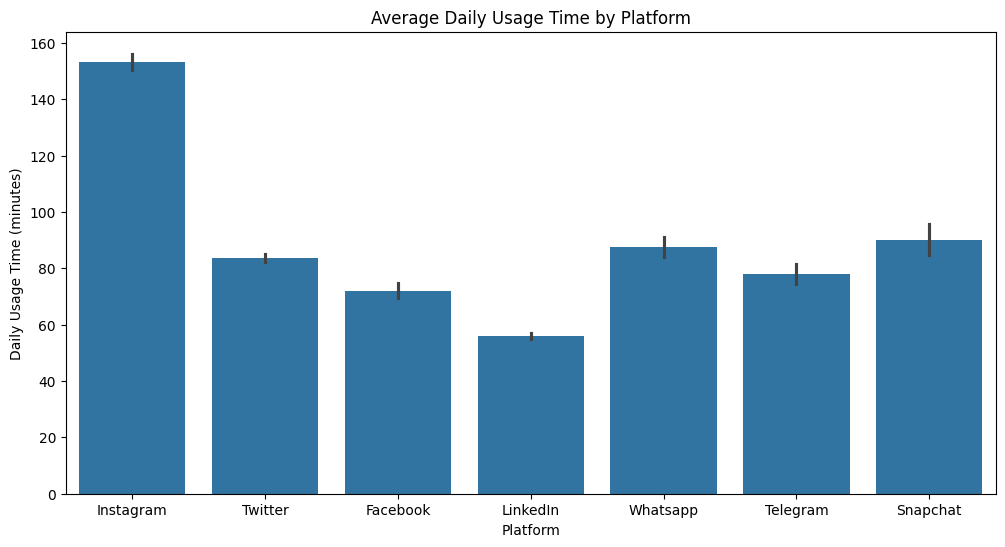

In [ ]:
#EDA

#Daily Usage Time by Platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

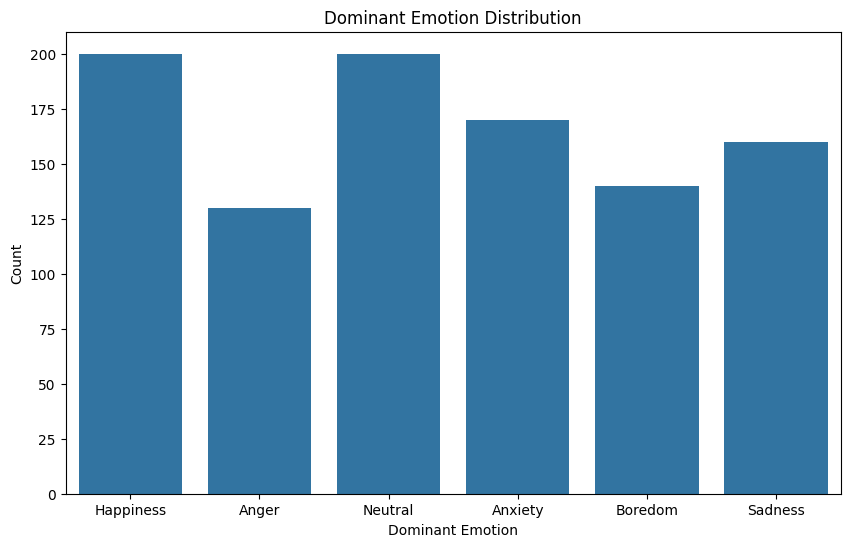

In [ ]:
#Dominant Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=df)
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

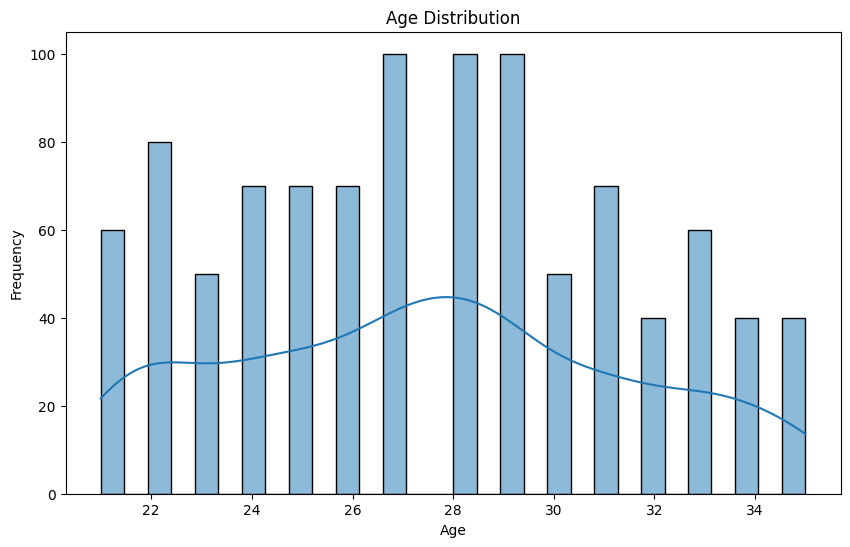

In [ ]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Outlier detection using IQR

numerical_columns = [
    'Daily_Usage_Time (minutes)',
    'Posts_Per_Day',
    'Likes_Received_Per_Day',
    'Comments_Received_Per_Day',
    'Messages_Sent_Per_Day'
]
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
outliers_summary_iqr = outliers_iqr.sum()

display(outliers_summary_iqr)

#removing outliers
clean_df = df[~outliers_iqr.any(axis=1)]

Daily_Usage_Time (minutes)     0
Posts_Per_Day                 29
Likes_Received_Per_Day         9
Comments_Received_Per_Day      0
Messages_Sent_Per_Day         29
dtype: int64

In [ ]:
#checking for and removing missing values
new_df = clean_df.dropna()
print(new_df.isnull().sum())

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [ ]:
#One hot encoding the categorical variables
new_df = pd.get_dummies(new_df, columns=['Gender', 'Platform'], drop_first=True)

In [ ]:
#Model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = new_df[['Age', 'Daily_Usage_Time (minutes)','Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']]
y = new_df['Dominant_Emotion']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print(f'Accuracy: {accuracy_logistic}')
print(f'Classification Report:\n{report_logistic}')

Accuracy: 0.5282051282051282
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.65      0.59        26
           1       0.50      0.49      0.49        37
           2       0.42      0.71      0.53        21
           3       0.85      0.83      0.84        35
           4       0.45      0.39      0.41        44
           5       0.37      0.22      0.27        32

    accuracy                           0.53       195
   macro avg       0.52      0.55      0.52       195
weighted avg       0.53      0.53      0.52       195



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)


print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f'Classification Report:\n{report_rf}')

Random Forest - Accuracy: 0.9846
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      0.97      0.99        37
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        35
           4       0.96      1.00      0.98        44
           5       1.00      0.97      0.98        32

    accuracy                           0.98       195
   macro avg       0.99      0.98      0.98       195
weighted avg       0.99      0.98      0.98       195



In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting - Accuracy: {accuracy_gb:.4f}")
print(f'Classification Report:\n{report_gb}')

Gradient Boosting - Accuracy: 0.9795
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      0.97      0.99        37
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        35
           4       0.96      1.00      0.98        44
           5       0.97      0.97      0.97        32

    accuracy                           0.98       195
   macro avg       0.98      0.98      0.98       195
weighted avg       0.98      0.98      0.98       195



In [ ]:
# Example data - Columns are [Age, Daily_Usage_Time (minutes), Posts_Per_Day, Likes_Received_Per_Day, Comments_Received_Per_Day, Messages_Sent_Per_Day ]
input_data = (23,100,1,30,6,50)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

# Making prediction using random forest as accuracy is greater
new_prediction = model_rf.predict(std_data)
print(new_prediction)

[[-1.1708719   0.18886047 -1.2117814  -0.32650485 -1.09354405  3.66527831]]
[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


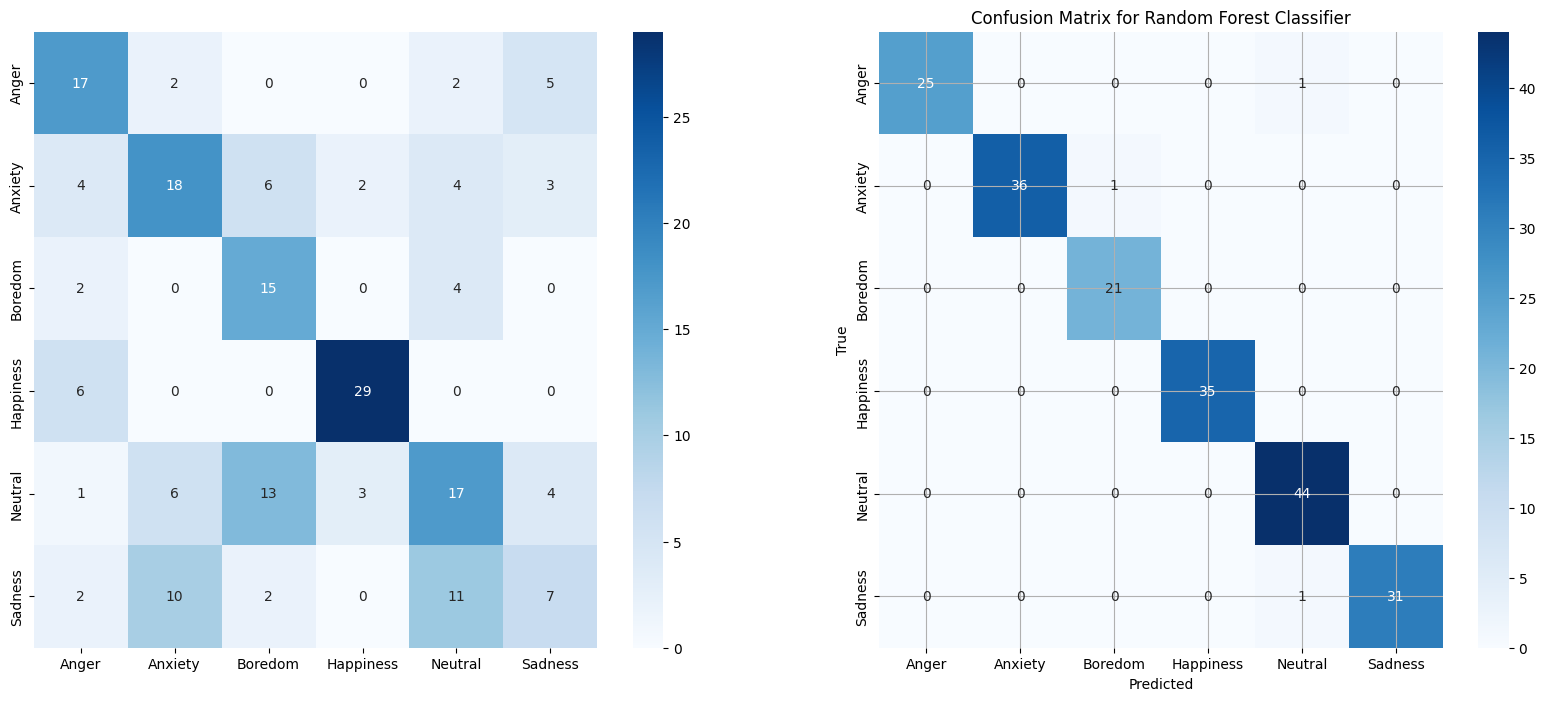

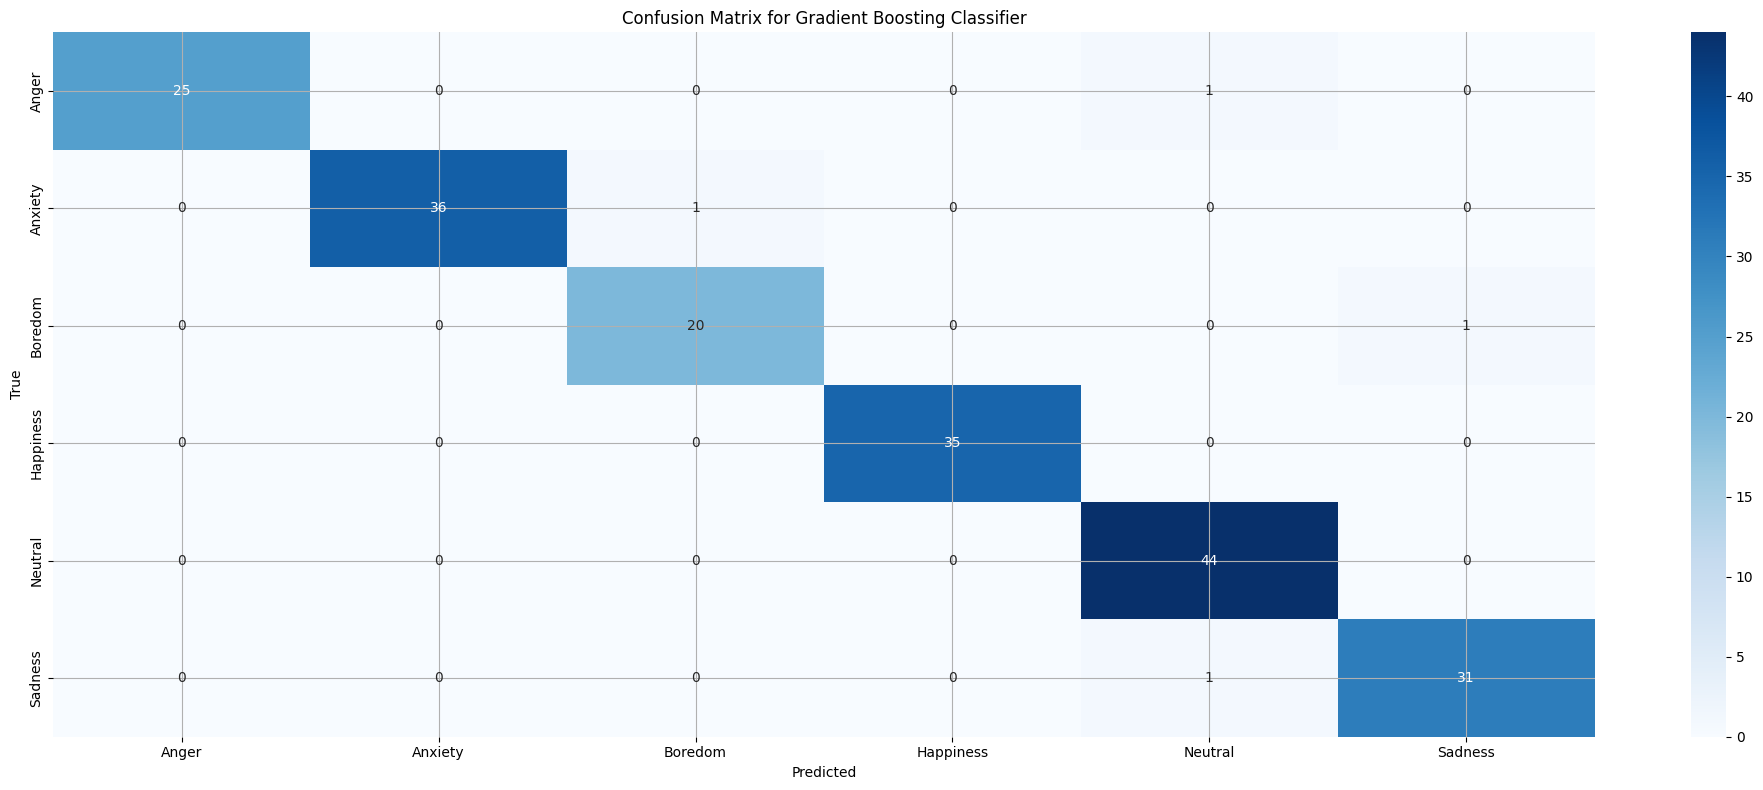

In [ ]:
#Confusion Matrices plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax = ax1,  xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid(True)

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax = ax2, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid(True)

fig, ax3 = plt.subplots(figsize=(20, 8))

cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax = ax3, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid(True)

plt.tight_layout()
plt.show()

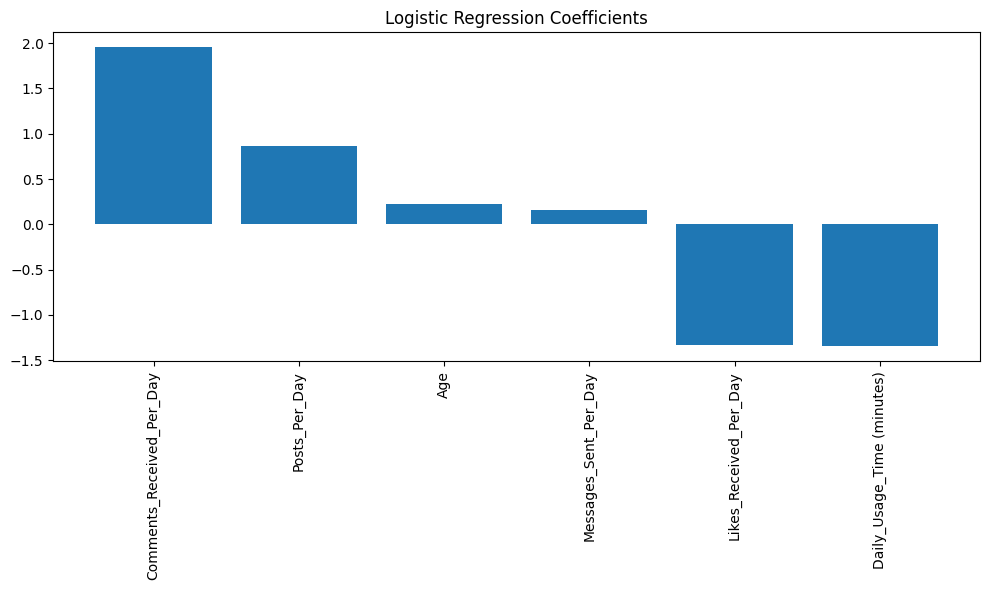

In [ ]:
#Co-efficients of Logistic Regression
coefficients = model_logistic.coef_[0]
indices = np.argsort(coefficients)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Logistic Regression Coefficients')
plt.bar(range(len(coefficients)), coefficients[indices], align='center')
plt.xticks(range(len(coefficients)), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

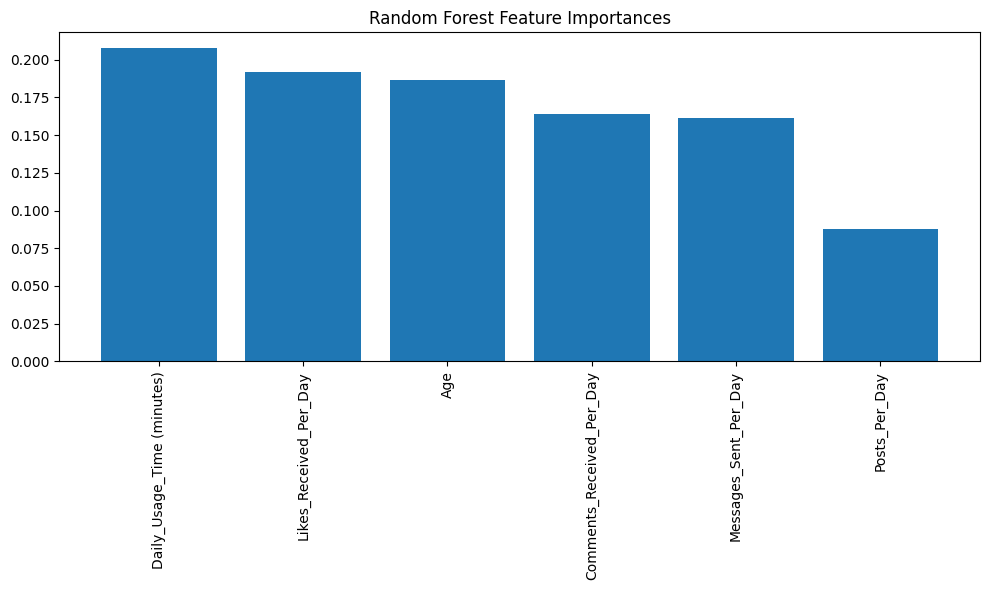

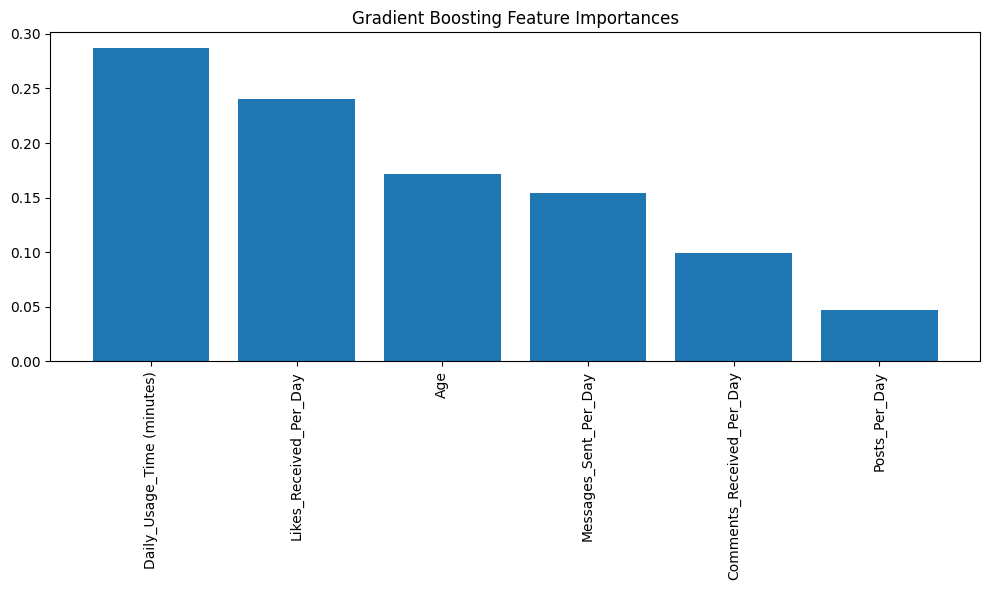

In [ ]:
#Feature Importances plot
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

importances = model_gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Gradient Boosting Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()